/tmp/ipykernel_559325/1515615781.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_group['year_month'] = fake_group['starredAt'].dt.to_period('M')
/tmp/ipykernel_559325/1515615781.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_group['year_month'] = fake_group['starredAt'].dt.to_period('M')
/tmp/ipykernel_559325/1515615781.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

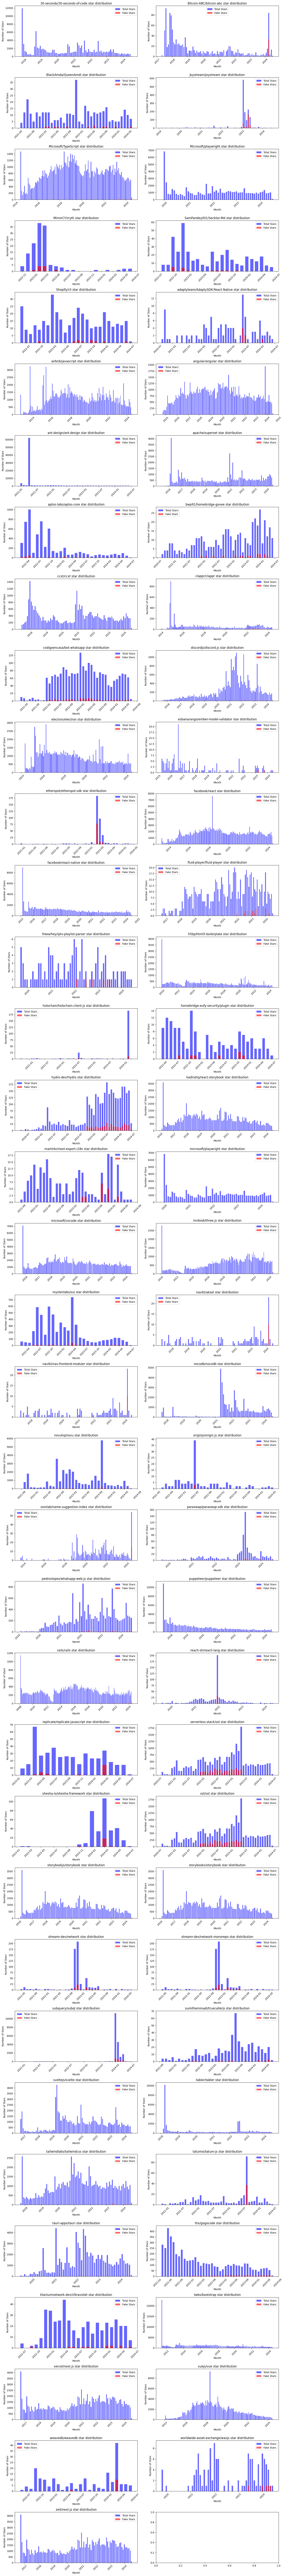

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
df_fake = pd.read_csv('data/filtered_repos_fake_users.csv')
df_total = pd.read_csv('data/filtered_repos_total_users.csv')

# Convert the 'starredAt' field to datetime
df_fake['starredAt'] = pd.to_datetime(df_fake['starredAt']).dt.tz_localize(None)
df_total['starredAt'] = pd.to_datetime(df_total['starredAt']).dt.tz_localize(None)

# Group the data by 'github' name
fake_grouped = df_fake.groupby("github")
total_grouped = df_total.groupby("github")

# Determine the number of unique 'github' names
num_githubs = len(total_grouped)

# Determine the grid size for subplots
rows = (num_githubs // 2) + (num_githubs % 2)
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Iterate over each group and plot on the respective subplot
for ax, (github, group) in zip(axes, total_grouped):
    fake_group = fake_grouped.get_group(github) if github in fake_grouped.groups else pd.DataFrame(columns=df_fake.columns)

    # Extract month and year from 'starredAt' field for total and fake groups
    group['year_month'] = group['starredAt'].dt.to_period('M')
    fake_group['year_month'] = fake_group['starredAt'].dt.to_period('M')

    # Count the number of occurrences per month for total and fake groups
    monthly_counts_total = group['year_month'].value_counts().sort_index()
    monthly_counts_fake = fake_group['year_month'].value_counts().sort_index()

    # Determine the overall date range
    
    min_date = group["starredAt"].min().to_period('M')
    max_date = group["starredAt"].max().to_period('M')
    all_months = pd.period_range(start=min_date, end=max_date, freq='M')

    # Reindex to include all months in the range
    monthly_counts_total = monthly_counts_total.reindex(all_months, fill_value=0)
    monthly_counts_fake = monthly_counts_fake.reindex(all_months, fill_value=0)

    # Plot the distribution
    ax.bar(monthly_counts_total.index.to_timestamp(), monthly_counts_total.values, color='blue', alpha=0.6, width=20, label='Total Stars')
    ax.bar(monthly_counts_fake.index.to_timestamp(), monthly_counts_fake.values, color='red', alpha=0.6, width=20, label='Fake Stars')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Stars')
    ax.set_title(f'{github} star distribution')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
